# **MODEL UNDERFITTING, OVERFITTING AND REGULARIZATION**

In [ ]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#generate some data ( a sine wave from 0 to 6pi)
N = 100
X = np.linspace(0, 6*np.pi, N)
Y = np.sin(X)

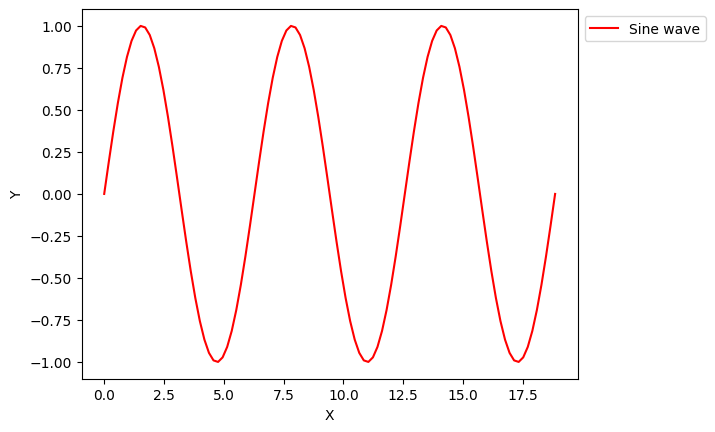

In [ ]:
#plot the data to visualise
plt.plot(X,Y, color = 'red', label = 'Sine wave')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
#Define a function 'make_poly' which makes a polynomial

def make_poly(X,deg):
  n = len(X)
  data = [np.ones(n)]               #adds a column of ones to the data
  for d in range(deg):              # This loop iterates from 0 up to (but not including) the specified degree (deg)
    data.append(X**(d+1))           #adds polyniomials from degree 1 to number of degrees specified in input arguments
  return np.vstack(data).T          # takes the list of arrays (data), stacks them vertically using np.vstack, and then takes the transpose (.T)

In essence, this function transforms your input data X into a matrix of polynomial features up to the specified degree, making it suitable for fitting polynomial regression models

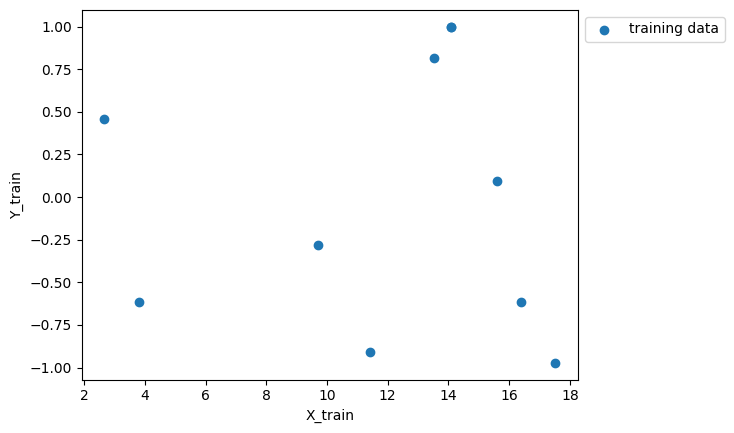

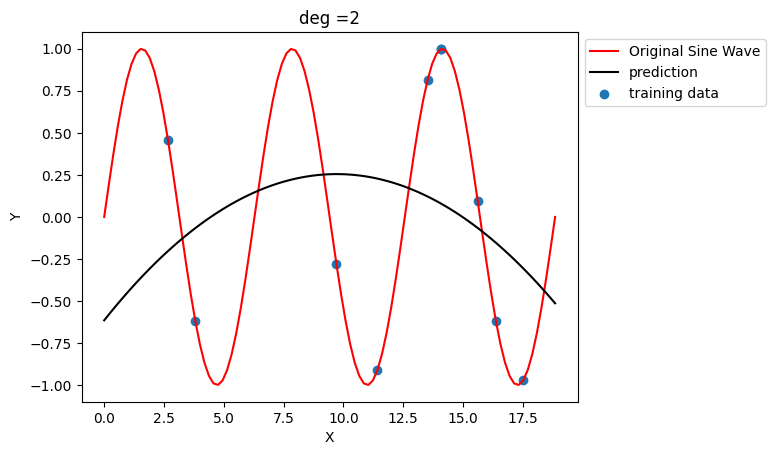

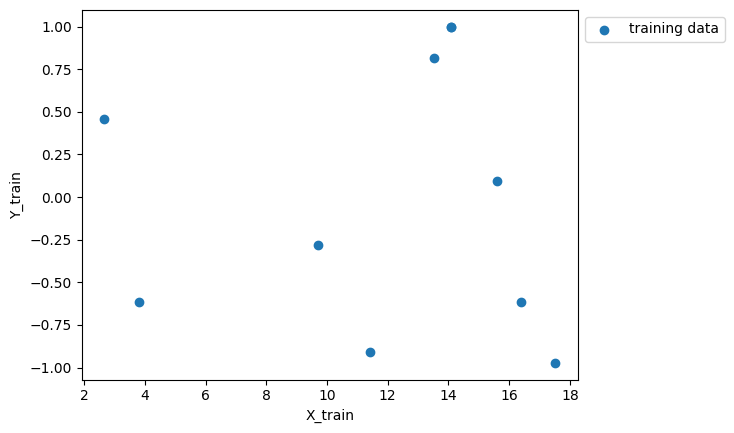

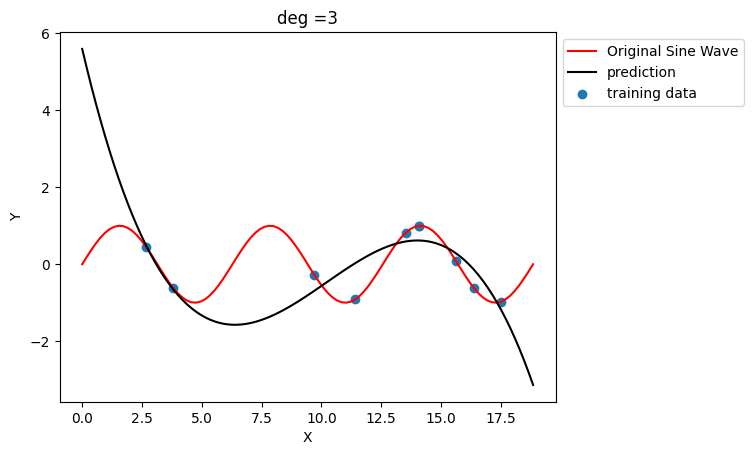

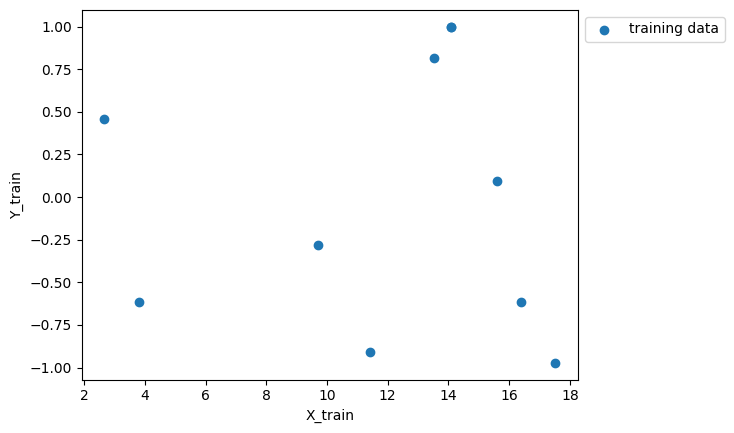

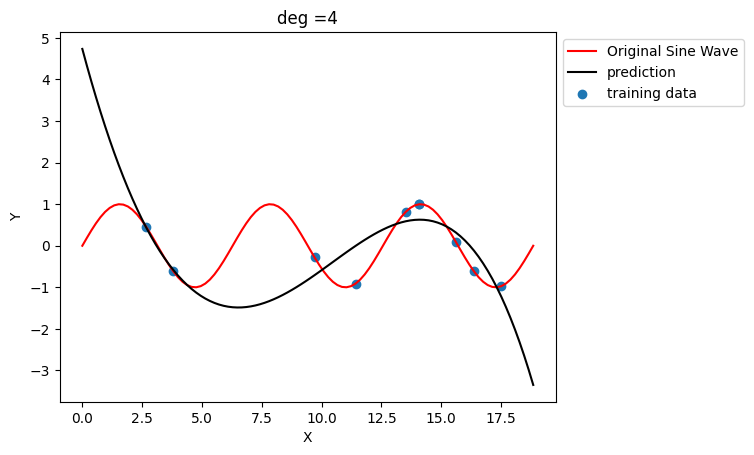

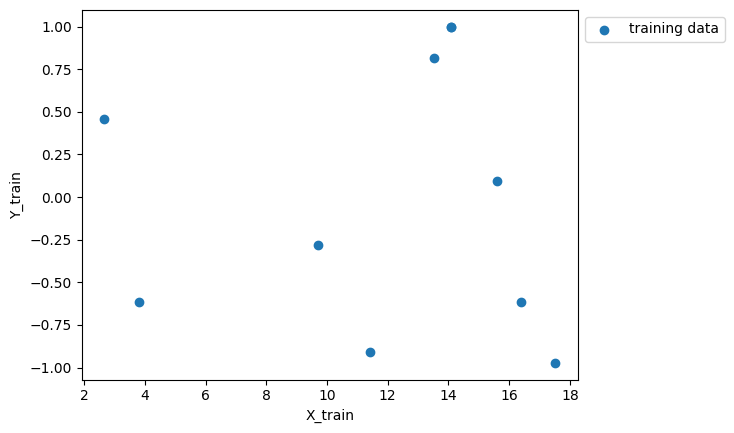

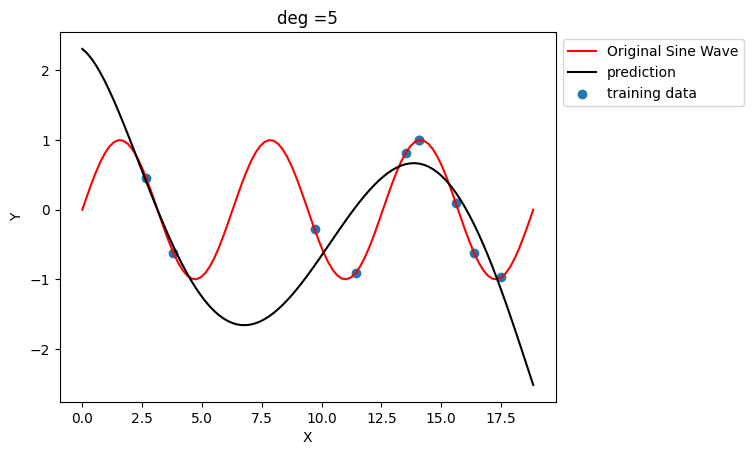

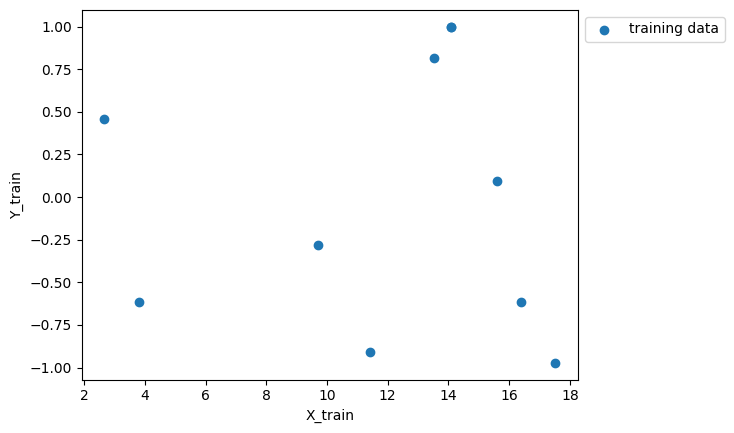

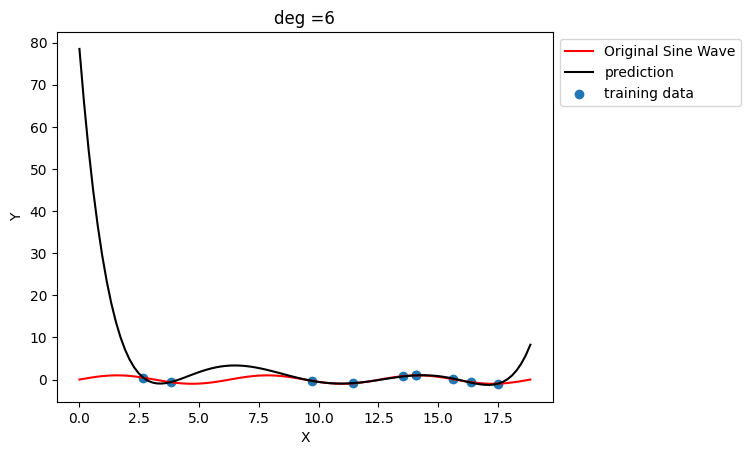

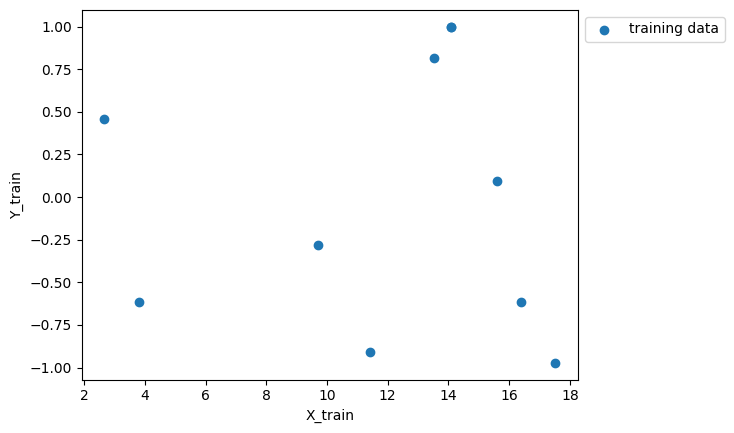

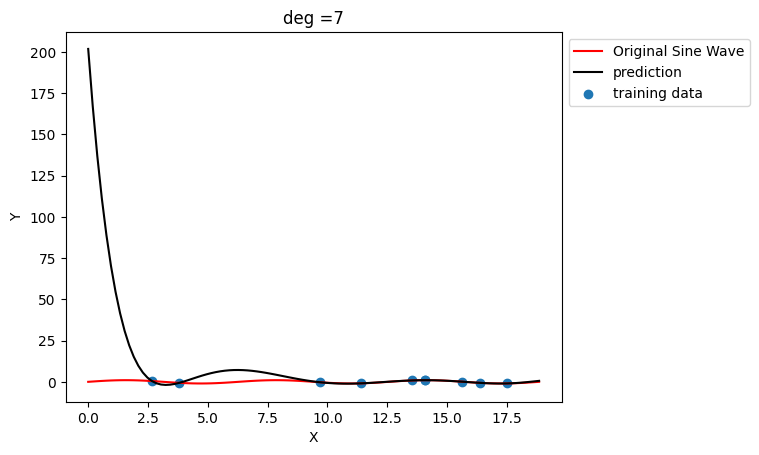

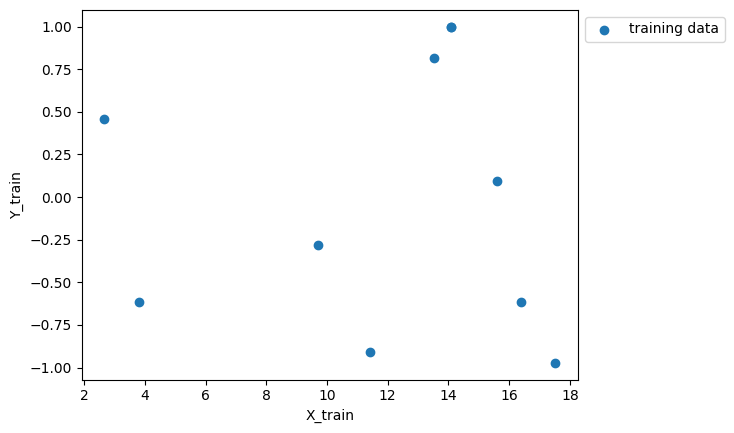

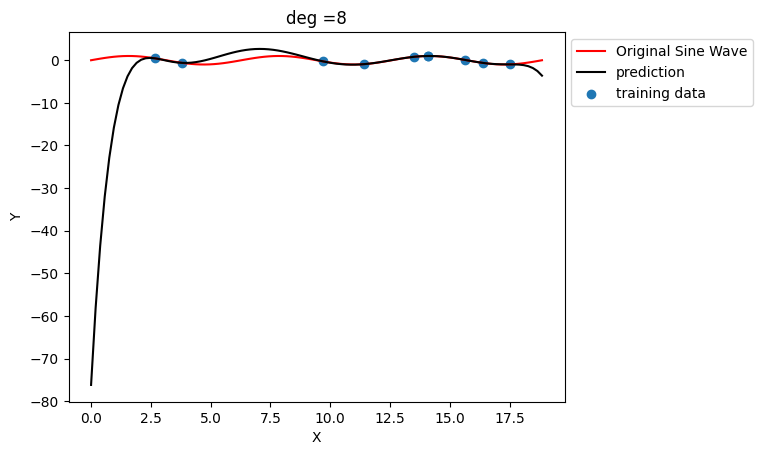

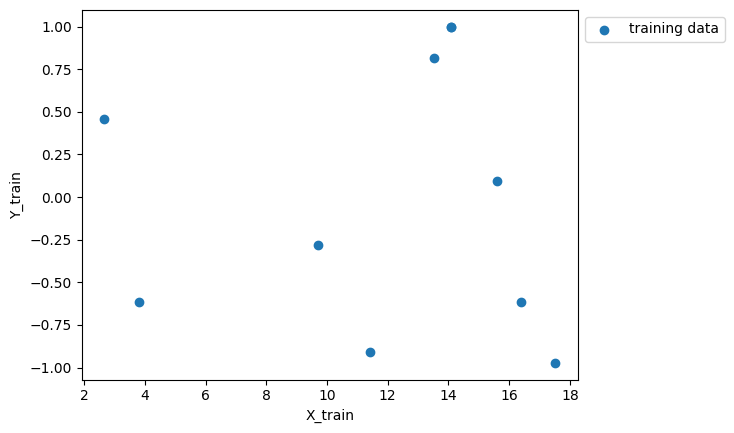

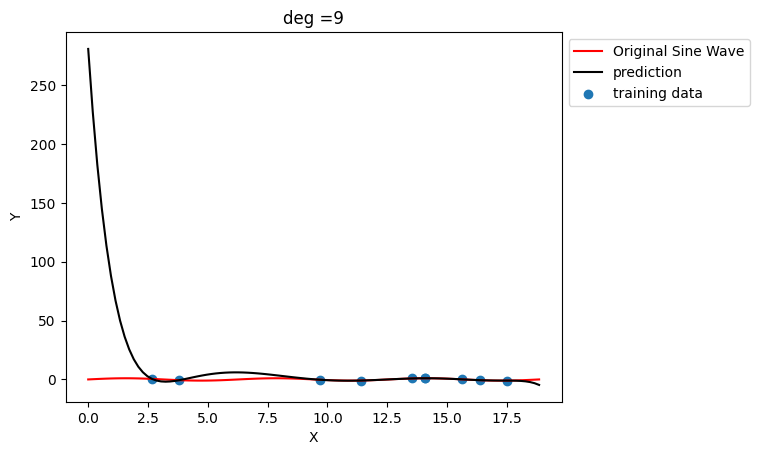

In [ ]:
#Define a function that fits and displays
def fit(X, Y):
    return np.linalg.solve(X.T.dot(X), X.T.dot(Y))

def fit_and_display(X,Y, sample,deg):
  N =len(X)
  np.random.seed(42) # Set the seed for reproducibility
  train_idx = np.random.choice(N, sample)        # takes random X,y samples and sets them as the training data
  Xtrain = X[train_idx]                          #rest of the data treated as the test data
  Ytrain = Y[train_idx]


  plt.scatter(Xtrain, Ytrain, label = 'training data')
  plt.xlabel('X_train')
  plt.ylabel('Y_train')
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside
  plt.show()


  #fit polynomial
  Xtrain_poly = make_poly(Xtrain, deg)         # makes a polynomial of specified n degree using the training data
  w = fit(Xtrain_poly,Ytrain)                  #calculates the weights fitting the X AND Y data to the nth degree polynomial



  #display the polynoomial
  X_poly = make_poly(X, deg)
  Yhat = X_poly.dot(w)
  plt.plot(X,Y, color = 'red', label = 'Original Sine Wave')
  plt.plot(X,Yhat, color= 'black', label = 'prediction')
  plt.scatter(Xtrain,Ytrain, label = 'training data' )
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('deg =%d' % deg)
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside
  plt.show()

for deg in(2, 3, 4, 5, 6, 7, 8, 9):
  fit_and_display(X,Y,10,deg)

The code above defines two functions, fit and fit_and_display, and then uses a loop to call fit_and_display with different polynomial degrees.

The fit function calculates the weights for a linear regression model.
The fit_and_display function samples training data, fits a polynomial model of a given degree to the sampled data, and then plots the original data, the sampled training data, and the fitted polynomial curve.
The loop at the end calls fit_and_display for polynomial degrees 5 through 9, each time using a random sample of 10 data points.
This code is used to visually demonstrate how changing the polynomial degree affects the model's fit, particularly in the context of overfitting and underfitting

In [ ]:
#Write a function that calculates the mean squared error
def get_mse(Y,Yhat):
  d = Y - Yhat
  return d.dot(d)/len(d)

# Plotting Train_vs_Test_Curves

Aim: To illustrate the concepts of overfitting and underfitting by plotting the Mean Squared Error (MSE) for both the training and testing datasets across a range of polynomial degrees.

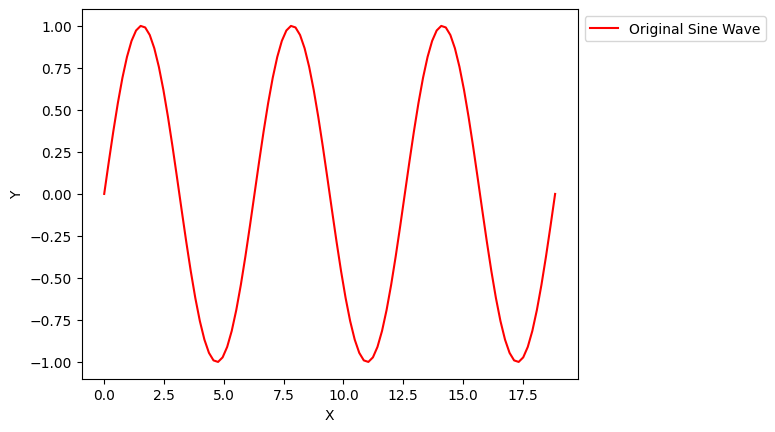

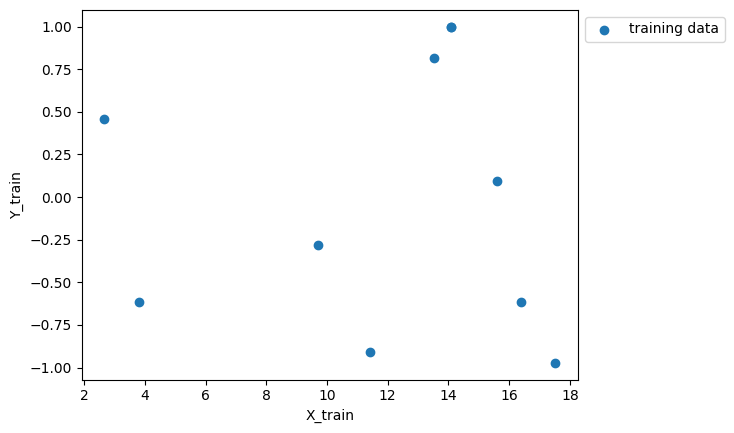

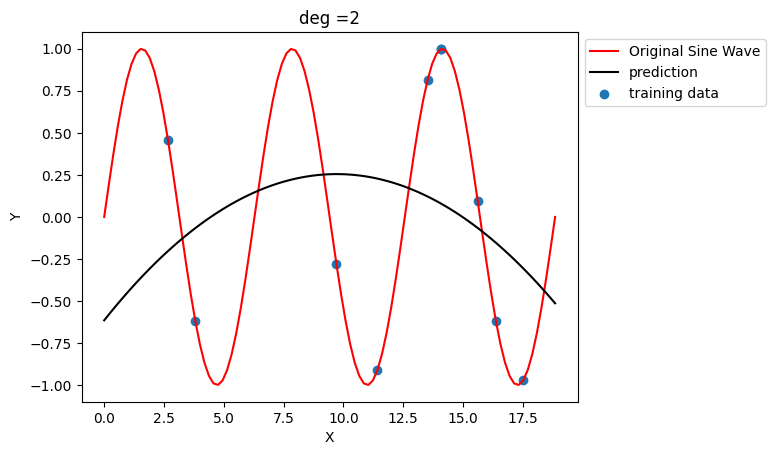

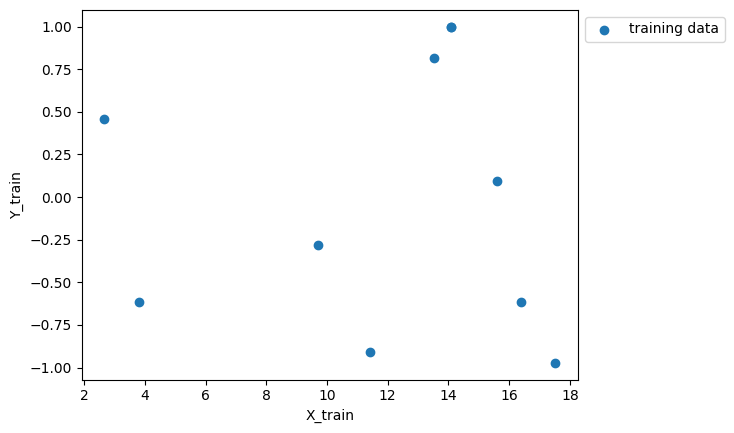

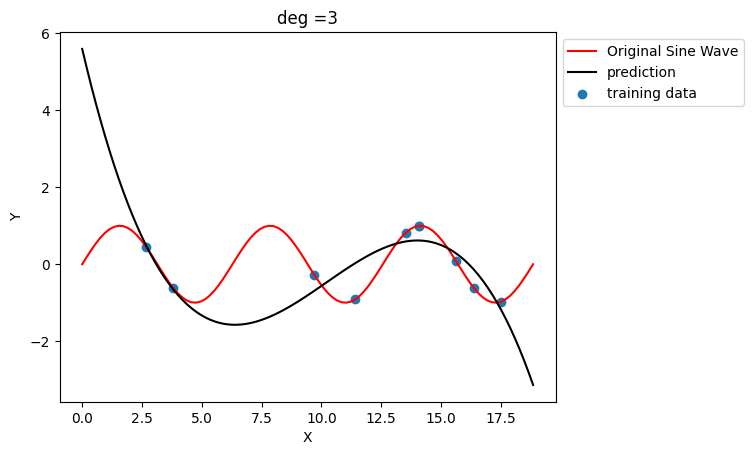

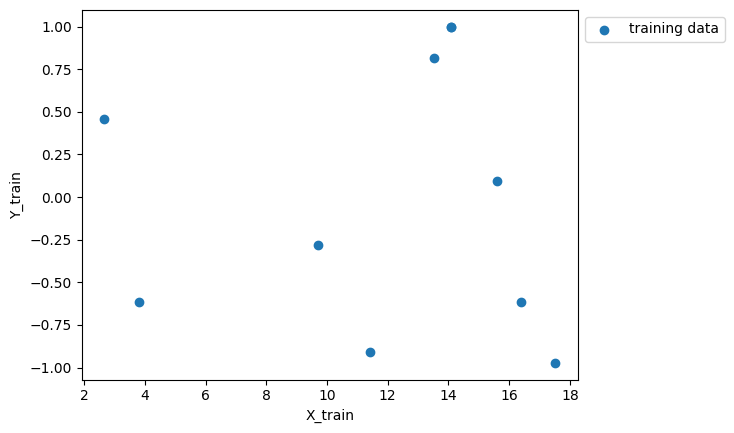

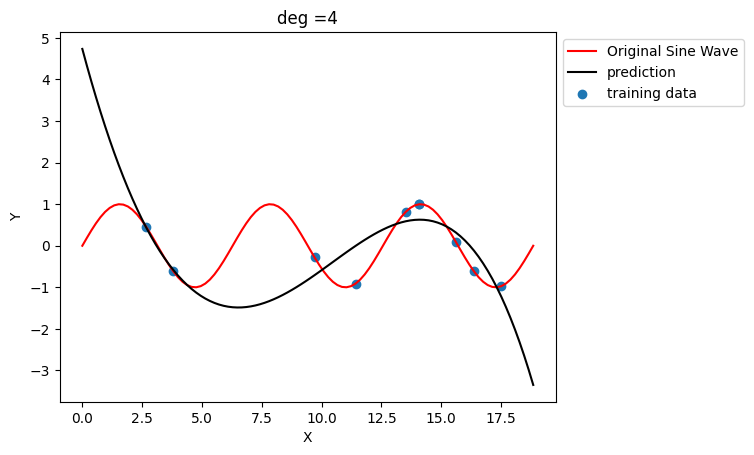

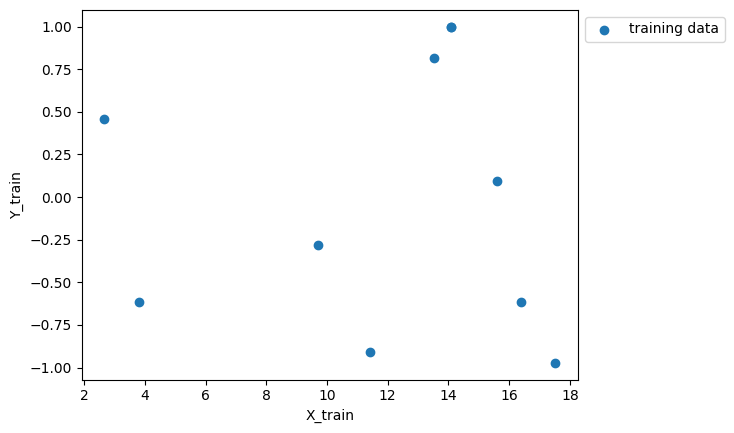

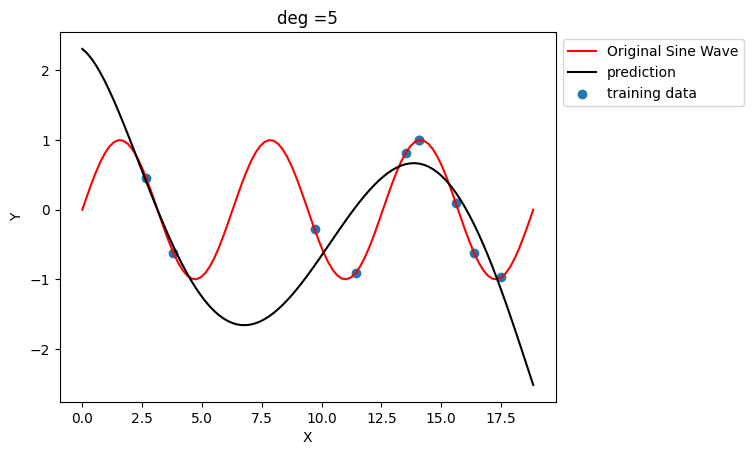

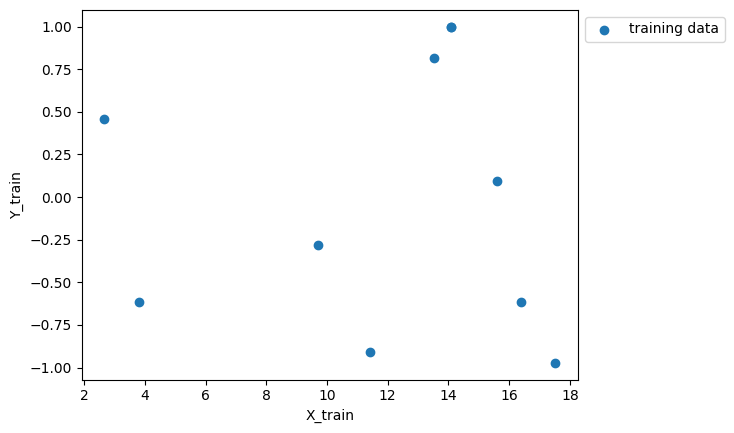

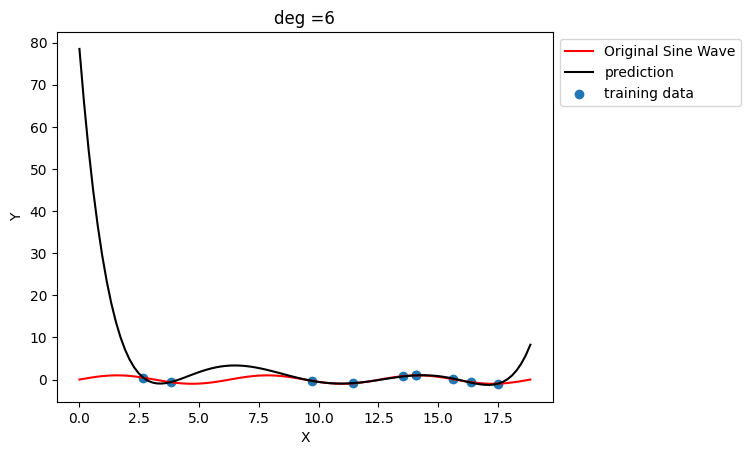

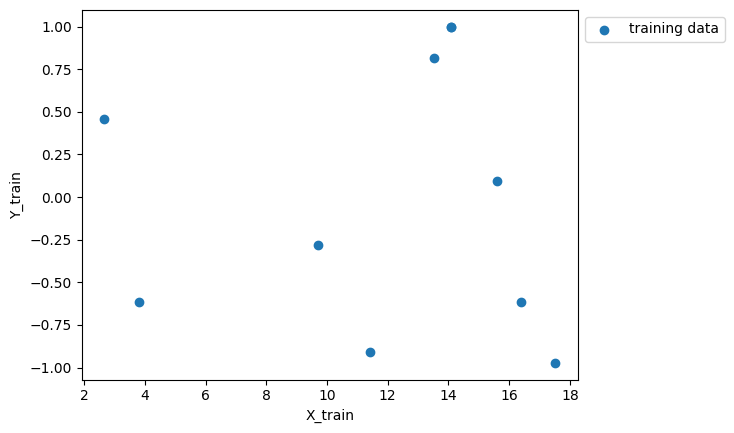

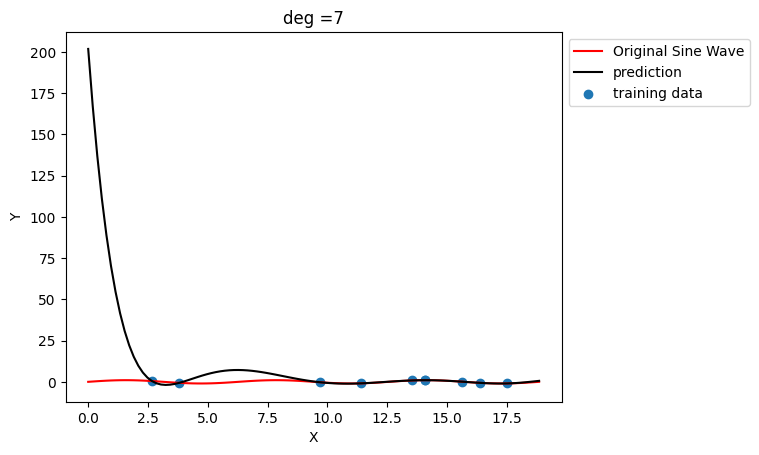

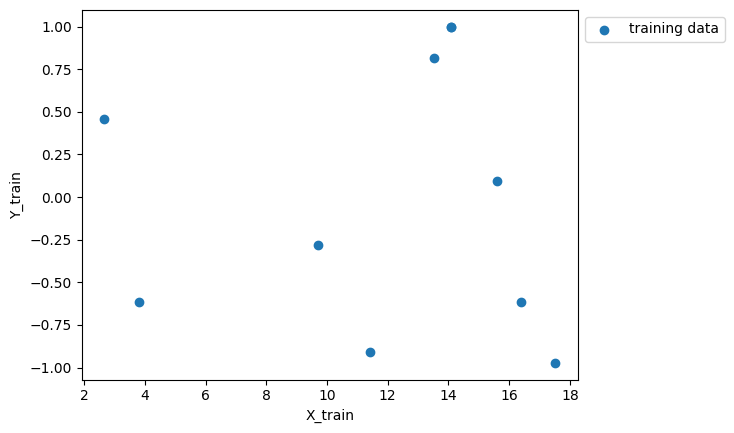

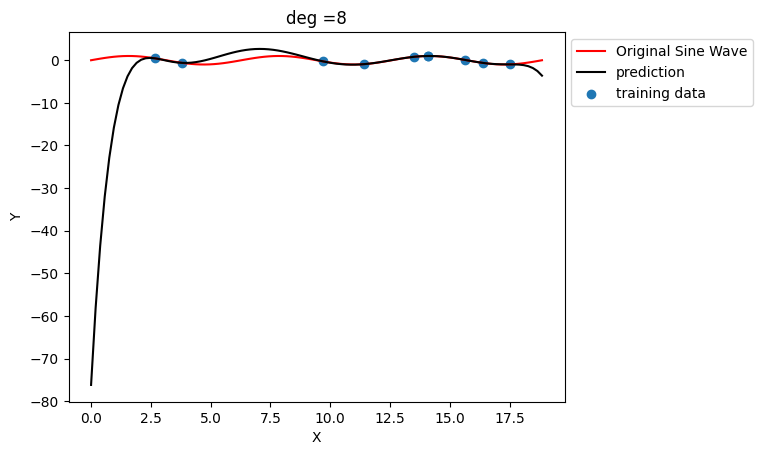

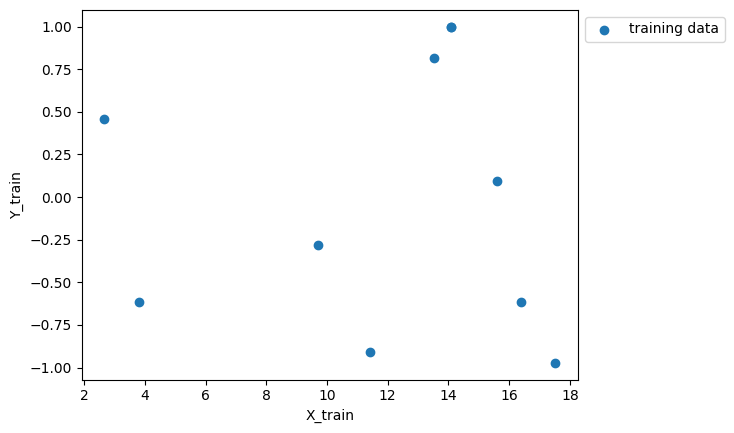

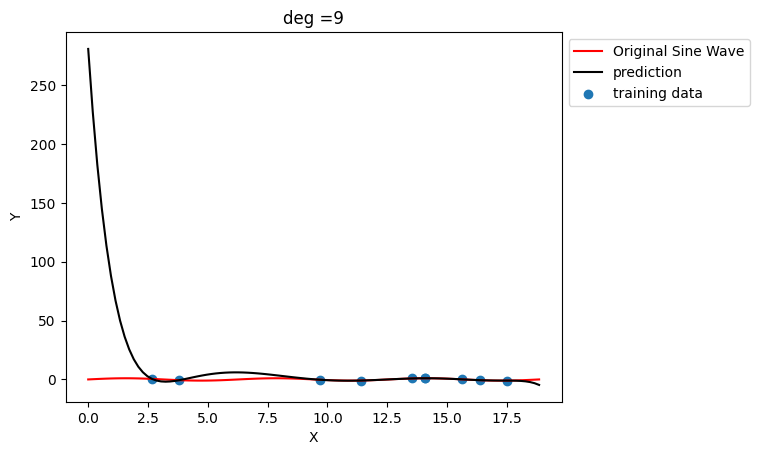

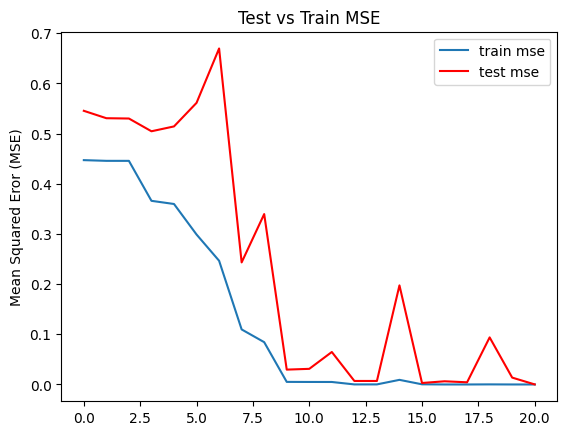

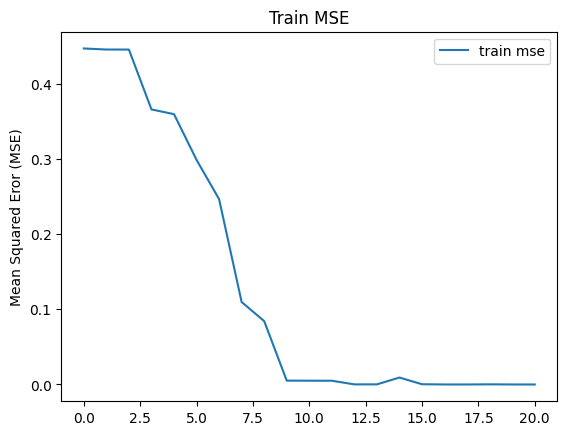

In [ ]:
   # 1.  FUNCTION DEFINITION AND ARGUMENTS

def plot_train_vs_test_curves(X, Y, sample=20, max_deg=20): #the number of samples for the training set (sample, defaulting to 20), and the maximum polynomial degree to test (max_deg, defaulting to 20).


   # 2. DATA SPLITTING:

    N = len(X)       #total number of data points to get
    np.random.seed(42) # Set the seed for reproducibility
    train_idx = np.random.choice(N, sample)            # Randomly selects sample indices for the training set.
    Xtrain = X[train_idx]          # Creates the training data using the selected indices.
    Ytrain = Y[train_idx]

    test_idx = [idx for idx in range(N) if idx not in train_idx]      # Creates a list of indices for the testing set by including all indices not in the training set.
    Xtest = X[test_idx]           # Creates a list of indices for the testing set by including all indices not in the training set.
    Ytest = Y[test_idx]


    # 3. ITERATING THROUGH POLYNOMIAL DEGREES:

    mse_trains = []  # initializes empty lists to store the training and testing MSE values for each degree.
    mse_tests = []
    for deg in range(max_deg+1):  # this loop iterates through polynomial degrees from 0 up to max_deg


    # 4.  MODEL TRAINING AND MSE CALCULATION:

      # within the loop:
        Xtrain_poly = make_poly(Xtrain, deg)     # Transforms the training input data into polynomial features of the current degree using the make_poly function.
        w = fit(Xtrain_poly, Ytrain)              # fits a linear regression model to the polynomial training data to get the weights w.
        Yhat_train = Xtrain_poly.dot(w)             # predicts the target values for the training data using the learned weights.#
        mse_train = get_mse(Ytrain, Yhat_train)     #Calculates the MSE for the training data using the get_mse function.

        Xtest_poly = make_poly(Xtest, deg)           # transforms the testing input data into polynomial features of the current degree using the make_poly function.
        Yhat_test = Xtest_poly.dot(w)                 # Predicts the target values for the testing data using the same learned weights from the training data.

        mse_test = get_mse(Ytest, Yhat_test)        # Calculates the MSE for the testing data using the get_mse functio

        mse_trains.append(mse_train)                # Appends the calculated training and testing MSE values to their respective lists.
        mse_tests.append(mse_test)


    # 5. PLOTTING THE RESULTS:

    plt.plot(mse_trains, label="train mse")
    plt.plot(mse_tests, label="test mse", color='red')   # Plots the training and testing MSE values against the polynomial degree
    plt.ylabel('Mean Squared Eror (MSE)')
    plt.title('Test vs Train MSE')
    plt.legend()
    plt.show()

    plt.plot(mse_trains, label="train mse")
    plt.ylabel('Mean Squared Eror (MSE)')
    plt.title('Train MSE')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # make up some data and plot it
    N = 100
    X = np.linspace(0, 6*np.pi, N)
    Y = np.sin(X)

    plt.plot(X, Y, color = 'red', label ='Original Sine Wave')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    for deg in (2, 3, 4, 5, 6, 7, 8, 9):
        fit_and_display(X, Y, 10, deg)
    plot_train_vs_test_curves(X, Y)

# **Analysis of Results**



1. **Low Polynomial Degrees (Underfitting):**
* At very low polynomial degrees (e.g., degree 0 or 1), both the training and testing MSE will likely be high.
* This is because a simple linear model (degree 1) or just a constant (degree 0) is not complex enough to capture the pattern of a sine wave. The model is underfitting the data – it's too simple to learn the underlying relationship. Both the training and testing errors are high because the model doesn't fit the data well, even the data it was trained on.

2. **Intermediate Polynomial Degrees (Good Fit):**
* As the polynomial degree increases, the training MSE will decrease because the model can fit the training data more closely.
* The testing MSE will also decrease initially. This is the "sweet spot" where the model is becoming complex enough to capture the true pattern in the data, and it generalizes well to unseen data.

3. **High Polynomial Degrees (Overfitting):**
* As the polynomial degree continues to increase beyond a certain point, the training MSE will keep decreasing (or level off at a very low value). This is because a very high-degree polynomial has enough flexibility to pass through or very close to all the training data points, including any noise or random fluctuations.
* However, the testing MSE will start to increase significantly. This is the point of overfitting. The model has become too complex and has learned the noise in the training data as if it were part of the true underlying pattern. When presented with new, unseen testing data, these spurious patterns don't hold true, leading to high errors on the testing set. The model fits the training data almost perfectly but fails to generalize to new data.

In summary:

* **Underfitting**:  High training MSE and high testing MSE. The model is too simple.
* **Good Fit**: Low training MSE and low testing MSE. The model captures the underlying pattern and generalizes well.
* **Overfitting**: Very low training MSE but high testing MSE. The model is too complex and has learned the noise in the training data.


The ideal model complexity (polynomial degree in this case) is often found at the point where the testing MSE is at its minimum.

This plot shows a visual representation of the trade-off between model complexity and generalization performance.

# **Mitigating Overfitting**

 Overfitting occurs when a model learns the training data and its noise too well, leading to poor performance on unseen data. There are a couple of key techniques to combat this:


# **Regularization**
 Regularization techniques add a penalty term to the model's loss function. This penalty discourages the model from assigning overly large weights to the features. By limiting the magnitude of the weights, regularization effectively reduces the complexity of the model, making it less likely to overfit.

Common types of regularization include:

* **L1 Regularization (Lasso)**: Adds the absolute values of the weights to the loss function. This can lead to some weights becoming exactly zero, effectively performing feature selection.
* **L2 Regularization (Ridge)**: Adds the squared values of the weights to the loss function. This shrinks the weights towards zero but doesn't force them to be exactly zero

Regularization helps to create a smoother model that is less sensitive to small fluctuations in the training data.



These techniques, along with others like increasing the amount of training data or using simpler models, are essential tools in preventing overfitting and building models that perform well on real-world data.

# **1. L1 Regularization (Lasso)**

Demonstrating Lasso Regression with a high degree (e.g., 15) and different alpha values:


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.948e-01, tolerance: 7.368e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

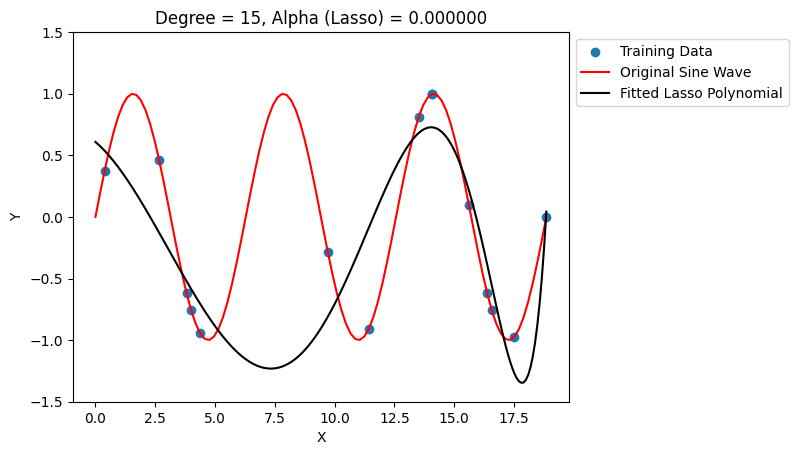

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.950e-01, tolerance: 7.368e-04
  model = cd_fast.enet_coordinate_descent(


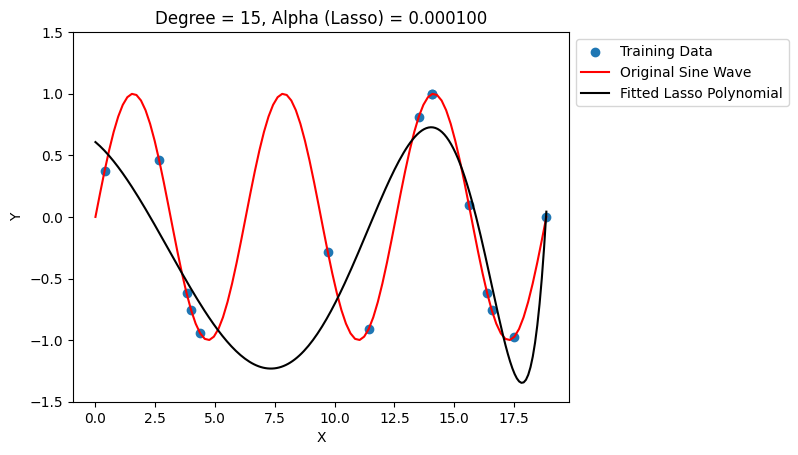

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.974e-01, tolerance: 7.368e-04
  model = cd_fast.enet_coordinate_descent(


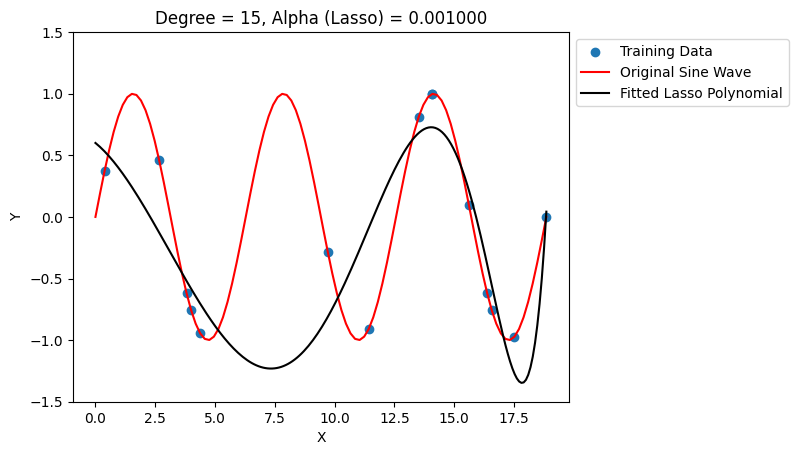

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.171e-01, tolerance: 7.368e-04
  model = cd_fast.enet_coordinate_descent(


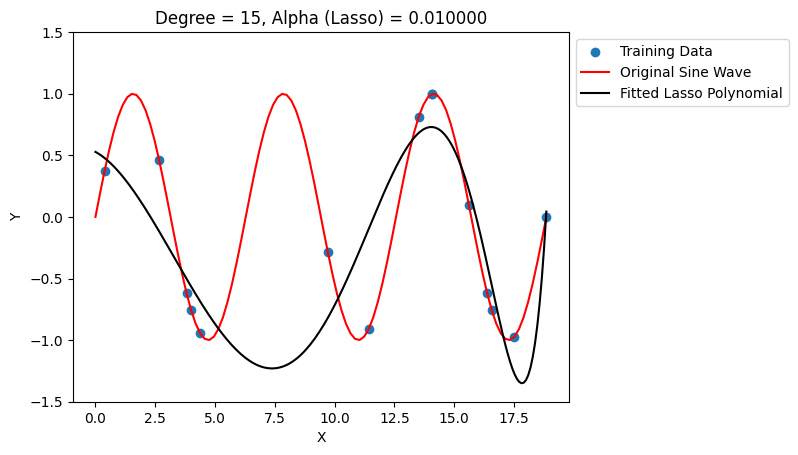

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+00, tolerance: 7.368e-04
  model = cd_fast.enet_coordinate_descent(


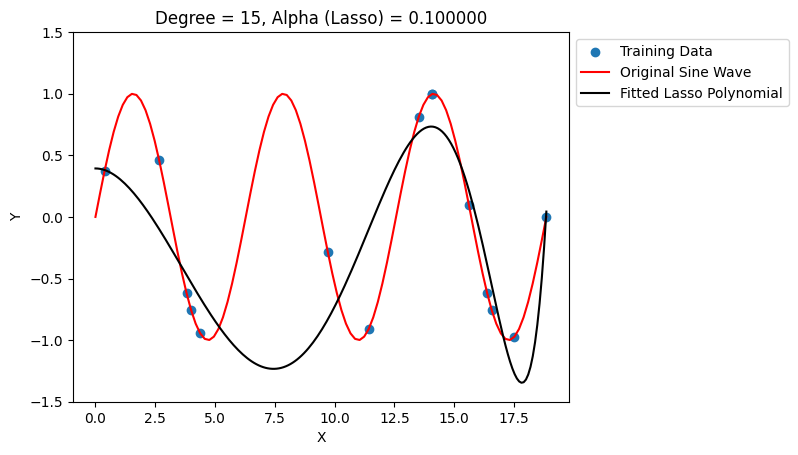

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.445e+00, tolerance: 7.368e-04
  model = cd_fast.enet_coordinate_descent(


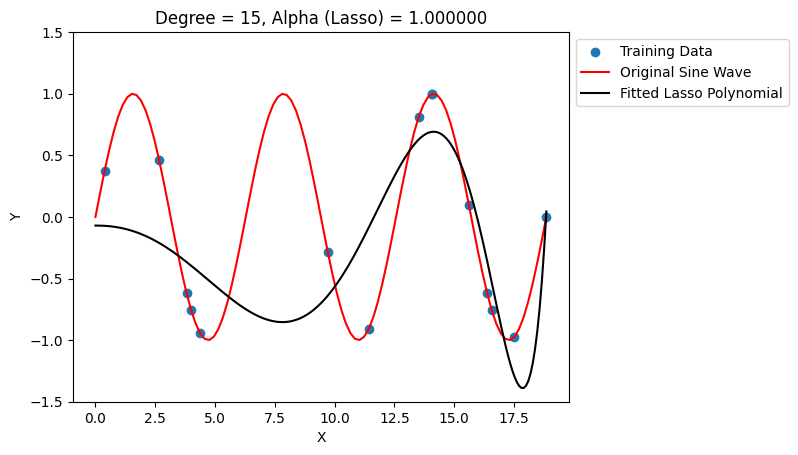

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define a function to display the fit using Lasso
def display_lasso_fit(X, Y, sample, deg, alpha_val=1.0):
    N = len(X)
    np.random.seed(42) # Set the seed for reproducibility
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx].reshape(-1, 1) # Reshape for scikit-learn
    Ytrain = Y[train_idx]

    plt.scatter(Xtrain, Ytrain, label='Training Data')

    # Create a pipeline that first transforms to polynomial features, then applies Lasso regression
    model = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False),
                          Lasso(alpha=alpha_val, max_iter=10000)) # Increased max_iter for convergence

    # Fit the model
    model.fit(Xtrain, Ytrain)

    # Display the polynomial
    X_test_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1) # Use a smoother range for plotting
    Yhat = model.predict(X_test_plot)

    plt.plot(X, Y, color='red', label='Original Sine Wave')
    plt.plot(X_test_plot, Yhat, color='black', label='Fitted Lasso Polynomial')

    plt.title('Degree = %d, Alpha (Lasso) = %f' % (deg, alpha_val))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside
    plt.ylim(-1.5, 1.5) # Set consistent y-axis limits for better comparison
    plt.show()

# --- Main part of the script to generate data and show examples ---

# Generate some data ( a sine wave from 0 to 6pi)
N = 100
X = np.linspace(0, 6 * np.pi, N)
Y = np.sin(X)

print("Demonstrating Lasso Regression with a high degree (e.g., 15) and different alpha values:")
high_deg = 15
sample_size = 15 # Increase sample size slightly for better demonstration

# Show fits with different alpha values
for alpha_val in (0, 0.0001, 0.001, 0.01, 0.1, 1):
    # Lasso with alpha=0 is equivalent to standard Linear Regression
    display_lasso_fit(X, Y, sample_size, high_deg, alpha_val)

# **2. L2 Regularization (Ridge)**

Demonstrating Ridge Regression with a high degree (e.g., 15) and different lambda values:


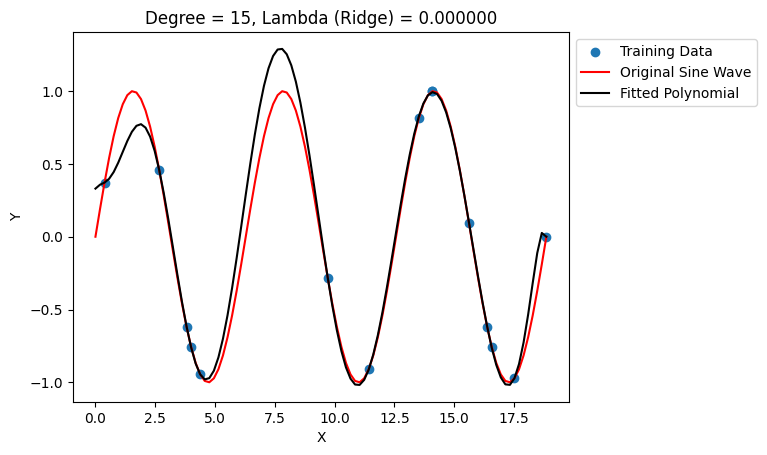

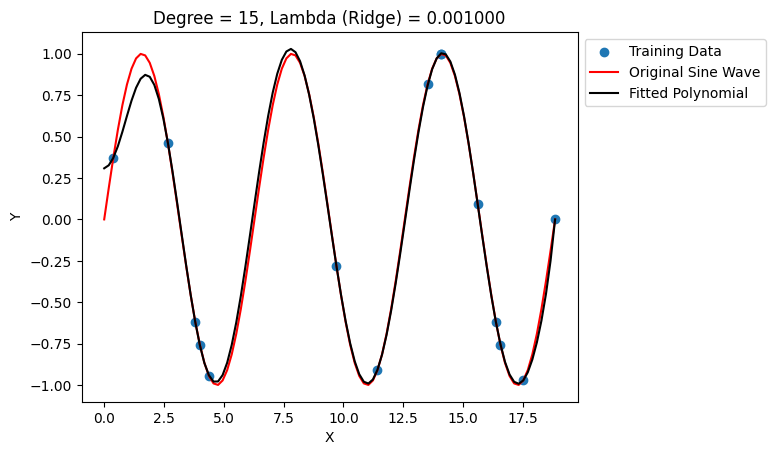

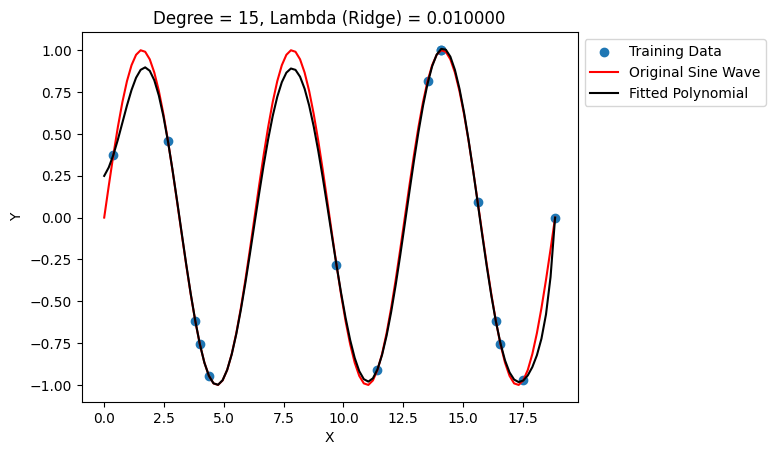

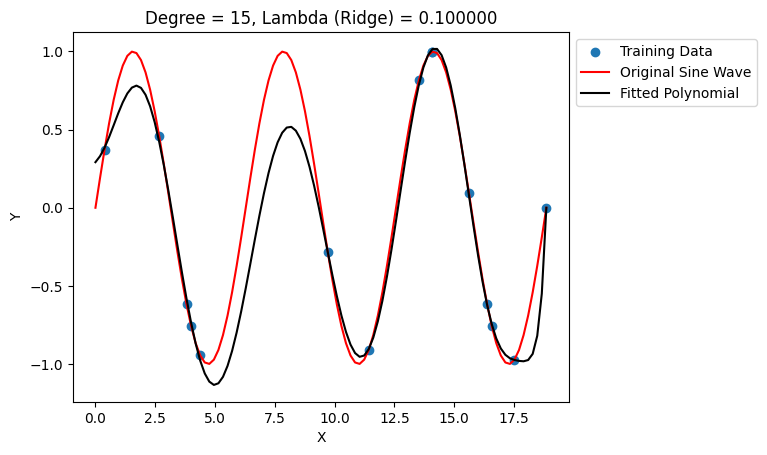

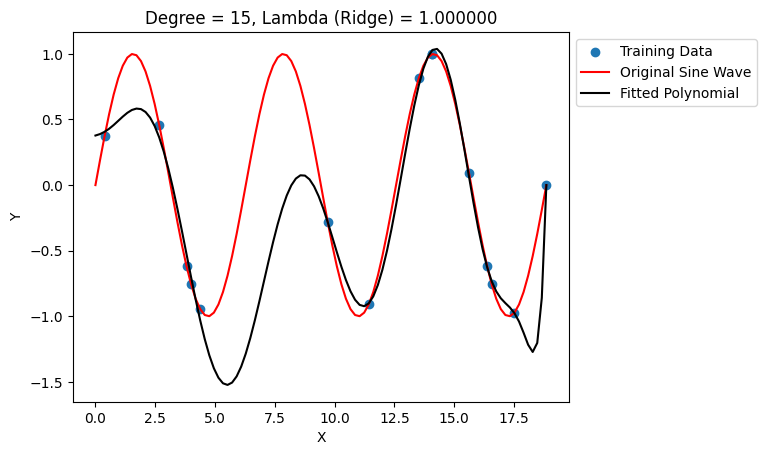

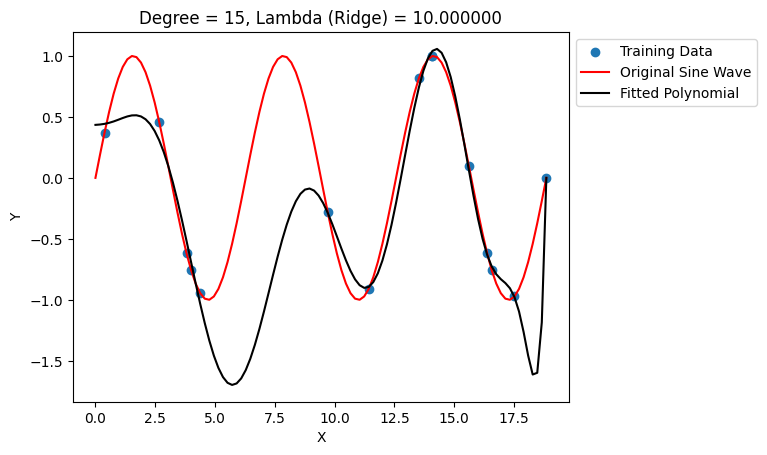

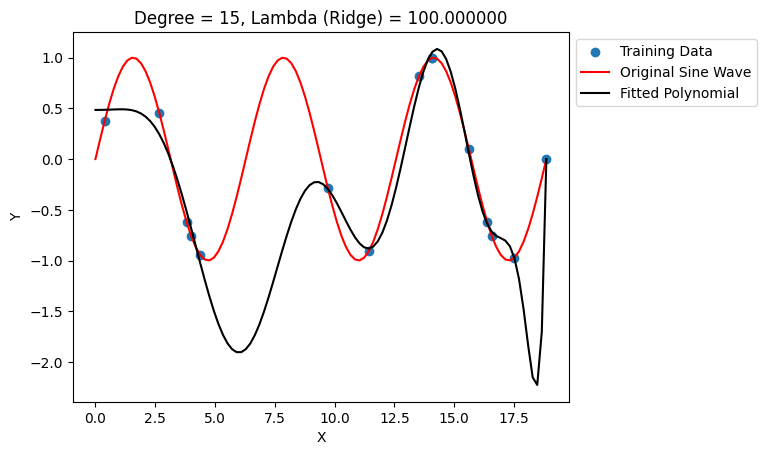

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function 'make_poly' which makes a polynomial
def make_poly(X, deg):
    n = len(X)
    data = [np.ones(n)]  # adds a column of ones to the data
    for d in range(deg):
        data.append(X**(d + 1))  # adds polynomials from degree 1 to number of degrees specified in input arguments
    return np.vstack(data).T

# Define a function that fits using Ridge regression
def fit_ridge(X, Y, lambda_val=0):
    # Add L2 regularization
    n_features = X.shape[1]
    I = np.identity(n_features)
    # We don't regularize the bias term (the column of ones), so set the first element of I to 0
    I[0, 0] = 0
    return np.linalg.solve(X.T.dot(X) + lambda_val * I, X.T.dot(Y))

# Define a function to display the fit
def display_fit(X, Y, sample, deg, lambda_val=0):
    N = len(X)
    np.random.seed(42) # Set the seed for reproducibility
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    plt.scatter(Xtrain, Ytrain, label='Training Data')


    #fit polynomial
    Xtrain_poly = make_poly(Xtrain, deg)
    w = fit_ridge(Xtrain_poly, Ytrain, lambda_val)  # Use fit_ridge

    #display the polynoomial
    X_poly = make_poly(X, deg)
    Yhat = X_poly.dot(w)
    plt.plot(X, Y, color='red', label='Original Sine Wave')
    plt.plot(X, Yhat, color='black', label='Fitted Polynomial')

    plt.title('Degree = %d, Lambda (Ridge) = %f' % (deg, lambda_val))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside
    plt.show()

# --- Main part of the script to generate data and show examples ---

# Generate some data ( a sine wave from 0 to 6pi)
N = 100
X = np.linspace(0, 6 * np.pi, N)
Y = np.sin(X)

print("Demonstrating Ridge Regression with a high degree (e.g., 15) and different lambda values:")
high_deg = 15
sample_size = 15 # Increase sample size slightly for better demonstration

# Show fits with different lambda values
for lambda_val in (0, 0.001, 0.01, 0.1, 1, 10, 100):
    display_fit(X, Y, sample_size, high_deg, lambda_val)

# **3. Cross Validation**


* Cross-validation is a technique used to estimate the performance of a model on unseen data during the training phase. Instead of just splitting the data into a single training and testing set, the data is divided into multiple folds.

* The model is trained on a subset of the folds and evaluated on the remaining fold(s). This process is repeated multiple times, with each fold serving as the validation set exactly once.

* The average performance across all the folds provides a more reliable estimate of how the model will perform on new data compared to a single train-test split.

* Cross-validation helps in selecting the optimal model complexity (e.g., the optimal polynomial degree) and hyperparameter values (like the strength of regularization) that generalize best to unseen data.

## **3.1_    Validation for performance of fitted polynomial model with (L2) Ridge Regression Regularization**

Using cross-validation to find the optimal lambda for Ridge regression:
Optimal lambda (alpha) found by cross-validation: 0.001
Test MSE with optimal lambda: 1.4077441395244302e+49


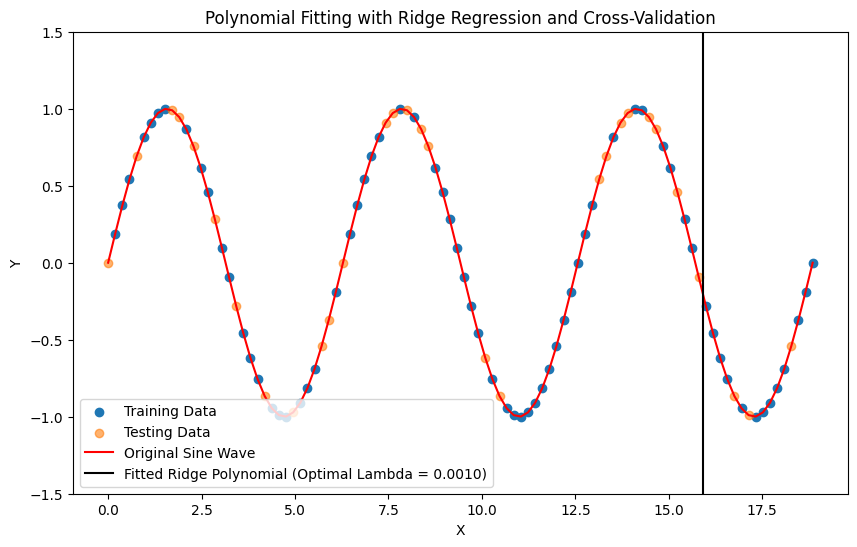

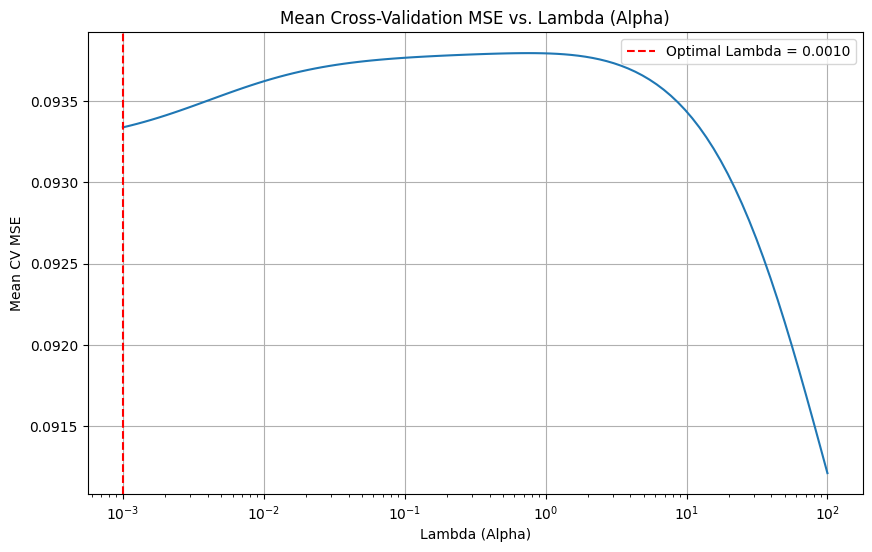

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # Import MSE for calculating the final test error

# Define a function 'make_poly' which makes a polynomial (using scikit-learn's PolynomialFeatures)
# We'll use the pipeline for a cleaner workflow

# --- Main part of the script to generate data and show examples ---

# Generate some data ( a sine wave from 0 to 6pi)
N = 100
X = np.linspace(0, 6 * np.pi, N).reshape(-1, 1) # Reshape for scikit-learn
Y = np.sin(X)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("Using cross-validation to find the optimal lambda for Ridge regression:")

# Define a range of alpha (lambda) values to test
# It's often good to test values on a logarithmic scale
alphas_to_test = np.logspace(-3, 2, 100) # Test 100 values between 10^-3 and 10^2

# Create a pipeline that first transforms to polynomial features, then applies RidgeCV
# cv=None uses Leave-One-Out cross-validation by default, or specify an integer for k-fold
# We specify scoring as 'neg_mean_squared_error' and store_cv_results to access mean test scores
ridge_model = make_pipeline(PolynomialFeatures(degree=15, include_bias=False), # Use a high degree
                      RidgeCV(alphas=alphas_to_test,
                              scoring='neg_mean_squared_error', # Use negative MSE as scoring metric
                              store_cv_results=True)) # Store results for plotting

# Fit the model using cross-validation on the training data
ridge_model.fit(X_train, Y_train)

# Get the best alpha found by cross-validation
best_alpha = ridge_model.named_steps['ridgecv'].alpha_
print(f"Optimal lambda (alpha) found by cross-validation: {best_alpha}")

# Predict on the test set with the model trained with the optimal alpha
Yhat_test = ridge_model.predict(X_test)

# Calculate MSE on the test set
# Use sklearn's mean_squared_error for consistency
mse_test = mean_squared_error(Y_test, Yhat_test)
print(f"Test MSE with optimal lambda: {mse_test}")


# --- Display the fit with the optimal lambda ---

# Generate points for plotting the fitted curve
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
Yhat_plot = ridge_model.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, label='Training Data')
plt.scatter(X_test, Y_test, label='Testing Data',alpha=0.6)
plt.plot(X, Y, color='red', label='Original Sine Wave')
plt.plot(X_plot, Yhat_plot, color='black', label=f'Fitted Ridge Polynomial (Optimal Lambda = {best_alpha:.4f})')

plt.title('Polynomial Fitting with Ridge Regression and Cross-Validation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()

# Plot the mean cross-validation MSE for each alpha value tested during CV
# We access the 'mean_test_score' from cv_results_ and negate it because scoring was negative MSE
# Given the shape (70, 1, 100), average over axis=0 and squeeze
mean_cv_mse = -np.squeeze(ridge_model.named_steps['ridgecv'].cv_results_.mean(axis=0))


plt.figure(figsize=(10, 6))
plt.plot(alphas_to_test, mean_cv_mse)
plt.xscale('log') # Use a log scale for the x-axis as alphas were tested on a log scale
plt.axvline(best_alpha, color='r', linestyle='--', label=f'Optimal Lambda = {best_alpha:.4f}')
plt.title('Mean Cross-Validation MSE vs. Lambda (Alpha)')
plt.xlabel('Lambda (Alpha)')
plt.ylabel('Mean CV MSE')
plt.legend()
plt.grid(True)
plt.show()

The plot of Mean Cross-Validation MSE vs. Lambda shows how the estimated generalization error changes with the regularization strength. The optimal lambada is where this curve is minimized.


## **3.2_    Validation for performance of fitted polynomial model with (L1) Lasso Regression Regularization**

Using cross-validation to find the optimal alpha for Lasso regression:


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012390199786310063, tolerance: 0.0026734852126842094
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12358400221051724, tolerance: 0.0026734852126842094
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: O

Optimal alpha found by cross-validation: 0.00019179102616724886
Test MSE with optimal alpha: 0.07876203554123092


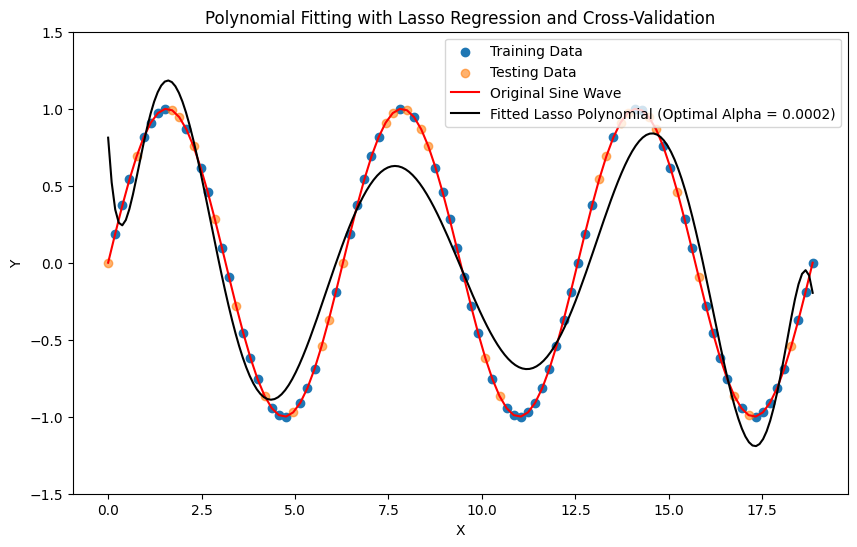

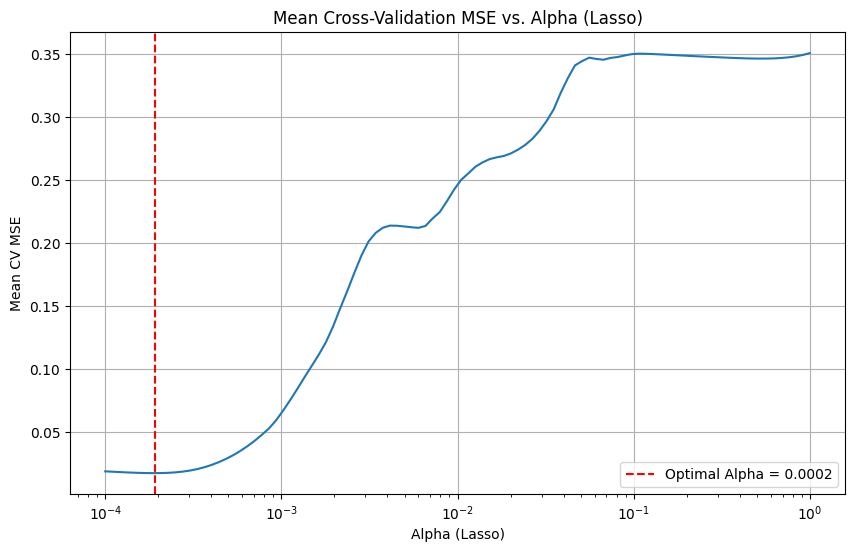

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler # Import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # Import MSE for calculating the final test error

# Define a function 'make_poly' which makes a polynomial (using scikit-learn's PolynomialFeatures)
# We'll use the pipeline for a cleaner workflow

# --- Main part of the script to generate data and show examples ---

# Generate some data ( a sine wave from 0 to 6pi)
N = 100
X = np.linspace(0, 6 * np.pi, N).reshape(-1, 1) # Reshape for scikit-learn
Y = np.sin(X)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("Using cross-validation to find the optimal alpha for Lasso regression:")

# Define a range of alpha values to test
# LassoCV can generate its own alphas, but we can also provide a list
# It's often good to test values on a logarithmic scale
alphas_to_test = np.logspace(-4, 0, 100) # Test 100 values between 10^-4 and 10^0 (adjust range as needed)


# Create a pipeline that first scales, then transforms to polynomial features, then applies LassoCV
# cv=None uses Leave-One-Out cross-validation by default, or specify an integer for k-fold
# We specify scoring as 'neg_mean_squared_error'
lasso_model = make_pipeline(StandardScaler(), # Add StandardScaler
                      PolynomialFeatures(degree=15, include_bias=False), # Use a high degree
                      LassoCV(alphas=alphas_to_test,
                              cv=5, # Use 5-fold cross-validation
                              random_state=42,
                              max_iter=50000)) # Increased max_iter further


# Fit the model using cross-validation on the training data
lasso_model.fit(X_train, Y_train)

# Get the best alpha found by cross-validation
best_alpha = lasso_model.named_steps['lassocv'].alpha_
print(f"Optimal alpha found by cross-validation: {best_alpha}")

# Predict on the test set with the model trained with the optimal alpha
Yhat_test = lasso_model.predict(X_test)

# Calculate MSE on the test set
# Use sklearn's mean_squared_error for consistency
mse_test = mean_squared_error(Y_test, Yhat_test)
print(f"Test MSE with optimal alpha: {mse_test}")


# --- Display the fit with the optimal alpha ---

# Generate points for plotting the fitted curve
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
Yhat_plot = lasso_model.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, label='Training Data')
plt.scatter(X_test, Y_test, label='Testing Data', alpha=0.6)
plt.plot(X, Y, color='red', label='Original Sine Wave')
plt.plot(X_plot, Yhat_plot, color='black', label=f'Fitted Lasso Polynomial (Optimal Alpha = {best_alpha:.4f})')

plt.title('Polynomial Fitting with Lasso Regression and Cross-Validation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()

# Plot the mean cross-validation MSE for each alpha value tested during CV
# LassoCV stores mean squared error in 'mse_path_'
# mse_path_ has shape (n_alphas, n_folds) or (n_alphas,) if cv=None
# We need to average across the folds if cv is not None
mean_cv_mse = lasso_model.named_steps['lassocv'].mse_path_.mean(axis=1)


plt.figure(figsize=(10, 6))
plt.plot(lasso_model.named_steps['lassocv'].alphas_, mean_cv_mse) # Plot against the actual alphas used by LassoCV
plt.xscale('log') # Use a log scale for the x-axis
plt.axvline(best_alpha, color='r', linestyle='--', label=f'Optimal Alpha = {best_alpha:.4f}')
plt.title('Mean Cross-Validation MSE vs. Alpha (Lasso)')
plt.xlabel('Alpha (Lasso)')
plt.ylabel('Mean CV MSE')
plt.legend()
plt.grid(True)
plt.show()

Successfully ran the code for LassoCV with feature scaling! Although still saw some ConvergenceWarning messages (which can sometimes occur with iterative solvers like Lasso, especially for very small alpha values or challenging data), the code did complete and produce the plots.


## **3.3_ Obtaining Lasso and Ridge Test data MSEs at Optimal Alphas**


In [ ]:

# Access variables from the Ridge CV cell
best_alpha_ridge = ridge_model.named_steps['ridgecv'].alpha_
mse_test_ridge = mean_squared_error(Y_test, ridge_model.predict(X_test))

# Access variables from the Lasso CV cell
best_alpha_lasso = lasso_model.named_steps['lassocv'].alpha_
mse_test_lasso = mean_squared_error(Y_test, lasso_model.predict(X_test))


print(f"Test MSE for Ridge with optimal lambda ({best_alpha_ridge:.4f}): {mse_test_ridge}")
print(f"Test MSE for Lasso with optimal alpha ({best_alpha_lasso:.4f}): {mse_test_lasso}")

Test MSE for Ridge with optimal lambda (0.0010): 1.4077441395244302e+49
Test MSE for Lasso with optimal alpha (0.0002): 0.07876203554123092


## **3.4_ Obtaining Lasso and Ridge Model-based Coefficients**

In [ ]:
# For Ridge:
ridge_coef = ridge_model.named_steps['ridgecv'].coef_
print("Ridge Coefficients:", ridge_coef)

# For Lasso:
lasso_coef = lasso_model.named_steps['lassocv'].coef_
print("Lasso Coefficients:", lasso_coef)

Ridge Coefficients: [ 8.94388204e-02  3.50633856e-01  5.82872206e-02 -2.27001117e-01
  1.21894466e-01 -3.95023208e-02  1.05777681e-02  1.17635727e-02
  2.06695557e-01  3.13012695e+00  4.72109375e+01  7.06625000e+02
  1.04777500e+04  1.53144000e+05  2.18419200e+06]
Lasso Coefficients: [-3.14042840e+00  1.39134087e+00  1.19580679e+01 -2.07311943e+00
 -1.04743430e+01  6.43657867e-01  2.06831064e+00  1.30429704e-01
  4.22666886e-01 -2.72296099e-02 -3.98343483e-02 -1.42387419e-02
 -2.73732035e-02  1.42643978e-03  2.18205503e-04]


# **4. Analysis on which Regularization Method Performed Better**
### **Comparing Lasso and Ridge based on:**
arameter to balance model complexity and performance on unseen data.

#### **1. The Plots:**

Both Ridge and Lasso aim to reduce overfitting by adding a penalty based on the magnitude of the weights.

The key difference you might visually observe (depending on the data and parameters) is that
* Lasso tends to produce sparser models by driving some weights exactly to zero, while
* Ridge shrinks weights towards zero but rarely makes them exactly zero. This means Lasso can sometimes be used for feature selection.

While the convergence warnings suggest that further tuning of max_iter or the alpha range might be beneficial for perfect convergence, the plots still provide a good illustration of how LassoCV uses cross-validation to find a suitable regularization parameter to balance model complexity and performance on unseen data.

#### **2. Test MSE:**

* Ridge: The test MSE with the optimal lambda (0.001) was a very large number (1.4077e+49). This suggests that even with regularization, the Ridge model with a high polynomial degree (15) struggled to generalize well to the unseen test data in this specific run.
* Lasso: The test MSE with the optimal alpha (0.0002) was significantly lower (0.0788). This indicates that the Lasso model with its optimal regularization strength was able to fit the test data much better than the Ridge model in this instance.

The method with the lower test MSE on the independent test set has potentially found a model that generalizes better to unseen data. Keep in mind that the test MSE is an estimate and can vary slightly depending on the train/test split

#### **3. Model Coefficients:**

To see a key difference between Ridge and Lasso, you could inspect the coefficients of the final fitted models. Lasso tends to shrink some coefficients exactly to zero, effectively performing feature selection. Ridge shrinks coefficients towards zero but rarely makes them exactly zero.
You can access the coefficients of the fitted models like this

* Ridge: The Ridge coefficients are generally non-zero, although some are very small. This is characteristic of L2 regularization, which shrinks coefficients towards zero but doesn't force them to be exactly zero.
* Lasso: The Lasso coefficients show that many of the coefficients for the higher-degree polynomial terms have been shrunk to values very close to zero (or are exactly zero, depending on the numerical precision). This demonstrates Lasso's ability to perform feature selection by effectively removing less important polynomial terms from the model.

# **5. Conclusion:**

Based on the significantly lower test MSE and the sparsity of the coefficients, Lasso regression performed better than Ridge regression in this particular demonstration of fitting a high-degree polynomial to the sine wave data. Lasso's ability to drive some coefficients to zero likely helped in simplifying the model and improving its generalization to unseen data, which is crucial in preventing overfitting.

It's important to note that the performance of regularization methods can depend on the specific dataset and the hyperparameters chosen. However, in this case, Lasso with cross-validation found a regularization strength that resulted in a much better fit on the test data compared to Ridge.